In [ ]:
#PROBLEM-5 SAX METHOD

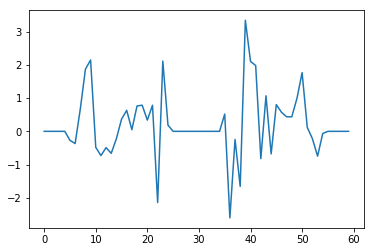

String: ecdced


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from saxpy.alphabet import cuts_for_asize
from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string
time_series = np.array([0., 0., 0., 0., 0., -0.270340178359072, -0.367828308500142,
                0.666980581124872, 1.87088147328446, 2.14548907684624,
                -0.480859313143032, -0.72911654245842, -0.490308602315934,
                -0.66152028906509, -0.221049033806403, 0.367003418871239,
                0.631073992586373, 0.0487728723414486, 0.762655178750436,
                0.78574757843331, 0.338239686422963, 0.784206454089066,
                -2.14265084073625, 2.11325193044223, 0.186018356196443,
                0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.519132472499234,
                -2.604783141655, -0.244519550114012, -1.6570790528784,
                3.34184602886343, 2.10361226260999, 1.9796808733979,
                -0.822247322003058, 1.06850578033292, -0.678811824405992,
                0.804225748913681, 0.57363964388698, 0.437113583759113,
                0.437208643628268, 0.989892093383503, 1.76545983424176,
                0.119483882364649, -0.222311941138971, -0.74669456611669,
                -0.0663660879732063, 0., 0., 0., 0., 0.,])
plt.plot(time_series)
plt.show()
a = znorm(time_series)
b = paa(a, 6)
print('String: ' + ts_to_string(b, cuts_for_asize(7)))

In [ ]:
#PROBLEM 6 WEKA AND APRIORI

In [ ]:
# Part1: Uploaded scanned copy

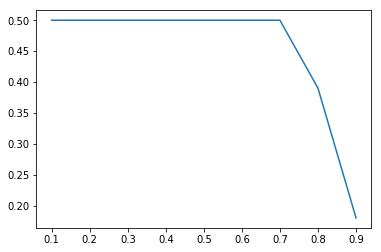

In [ ]:
# Part2

import matplotlib.pyplot as plt
confidence_c=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_min_sup=[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.39,0.18]
plt.plot(confidence_c,max_min_sup)
plt.show()

In [ ]:
# Confidence is inversely proportional to maximum minimum-support.
# when we increase the minimum confidence values,
# ... the maximum minimum-support values remain stable for a certain threshold, ...
# ... but then it decreases significantly.
# this implies that greater the confidence value, lower is the ...
# ... frequency/support of the unique items in itemset.
# Also such itemsets are very rare. this indicates these items are always ...
# purchased together, but are rarelyt bought.

In [ ]:
#COLLABORATIVE FILTERING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
column = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('D:/Desktop/SUsem1/Intro to DS/HW/H3/ml-100k/u.data', sep='\t', names= column, encoding='latin-1')
data['user_id'] = data['user_id'].fillna(0)
data['item_id'] = data['item_id'].fillna(0)
data['rating'] = data['rating'].fillna(data['rating'].mean())
data.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [ ]:
u_num = data.user_id.unique().shape[0]
i_num = data.item_id.unique().shape[0]
ratings = np.zeros((u_num, i_num))
for r in data.itertuples():
    ratings[r[1]-1, r[2]-1] = r[3]

In [ ]:
def similarity(r, temp):
    if temp == 'user':
        similarity = 1 - pairwise_distances(r, metric='correlation')
        similarity[np.isnan(similarity)] = 0
    elif temp == 'item':
        similarity = 1 - pairwise_distances(r.T, metric='correlation')
        similarity[np.isnan(similarity)] = 0
    return similarity

In [ ]:
def predict(ratings, similarity, temp, k):
    p = np.zeros(ratings.shape)
    if temp == 'user':
        for i in range(ratings.shape[0]):
            u_top = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in range(ratings.shape[1]):
                p[i, j] = similarity[i, :][u_top].dot(ratings[:, j][u_top]) 
                p[i, j] /= np.sum(np.abs(similarity[i, :][u_top]))
    if temp == 'item':
        for j in range(ratings.shape[1]):
            i_top = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in range(ratings.shape[0]):
                p[i, j] = similarity[j, :][i_top].dot(ratings[i, :][i_top].T) 
                p[i, j] /= np.sum(np.abs(similarity[j, :][i_top]))        
    return p

In [ ]:
k = int(input("Neighbourhood size:"))
u = int(input("user-id:"))
i = int(input("item-id:"))
row = data[(data['user_id']==u) & (data['item_id']==i)]
index = row.index
u_similarity = similarity(ratings, temp='user')
i_similarity = similarity(ratings, temp='item')
u_pred = predict(ratings, u_similarity, 'user', k)
i_pred = predict(ratings, i_similarity, 'item', k)
u_rating = u_pred[np.nonzero(u_pred)].mean()
i_rating = i_pred[np.nonzero(i_pred)].mean()
print("user-based CF rating:", u_rating)
print("item-based CF rating:", i_rating)

Neighbourhood size:5
user-id:7
item-id:9
user-based CF rating: 1.3682500370216961
item-based CF rating: 1.4809125030326606
